# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
record=1
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]


for city in cities:
    response = requests.get(f"{url}&q={city}")
    try:
        response.raise_for_status()
        response_json=response.json()
        #print(response_json)
        city_name.append(response_json["name"])
        #city_record=response_json["name"]
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        max_temp.append(response_json["main"]["temp_max"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        wind_speed.append(response_json["wind"]["speed"])
        print(f"Processing Record {record} | {response_json['name']}")
        record=record+1
    except requests.exceptions.HTTPError as e:
        print(f"City not found. Skipping")
    #continue
    

Processing Record 1 | Qaanaaq
Processing Record 2 | Castro
Processing Record 3 | Esperance
Processing Record 4 | Jamestown
Processing Record 5 | Kapaa
City not found. Skipping
Processing Record 6 | Sumbe
Processing Record 7 | Shelburne
Processing Record 8 | Iqaluit
Processing Record 9 | Cape Town
Processing Record 10 | Hervey Bay
Processing Record 11 | Port Alfred
Processing Record 12 | Hoi An
Processing Record 13 | Tortosa
Processing Record 14 | Bredasdorp
Processing Record 15 | Cabo San Lucas
Processing Record 16 | Petropavlovsk-Kamchatskiy
Processing Record 17 | Omboue
City not found. Skipping
Processing Record 18 | Saint-Philippe
Processing Record 19 | Rikitea
Processing Record 20 | Los Llanos de Aridane
Processing Record 21 | Sigli
Processing Record 22 | Chicaman
Processing Record 23 | Alice Springs
Processing Record 24 | Mbandaka
Processing Record 25 | Andros Town
Processing Record 26 | Otradnoye
City not found. Skipping
Processing Record 27 | Ucluelet
Processing Record 28 | New 

Processing Record 226 | Whitehorse
Processing Record 227 | Horasan
Processing Record 228 | Arshan
Processing Record 229 | Candeias
Processing Record 230 | Burns Lake
Processing Record 231 | Basoko
Processing Record 232 | Mayumba
Processing Record 233 | Norsup
City not found. Skipping
Processing Record 234 | Yellowknife
Processing Record 235 | Trinidad
Processing Record 236 | Santa Cruz de la Palma
Processing Record 237 | Te Anau
Processing Record 238 | Balabac
Processing Record 239 | Raudeberg
Processing Record 240 | Umm Kaddadah
City not found. Skipping
City not found. Skipping
Processing Record 241 | Huanren
Processing Record 242 | Jiutai
Processing Record 243 | Seoul
Processing Record 244 | Aanekoski
Processing Record 245 | Rosarito
Processing Record 246 | Ashdod
Processing Record 247 | Vila
City not found. Skipping
Processing Record 248 | Sydney Mines
Processing Record 249 | Cayenne
Processing Record 250 | Nantucket
Processing Record 251 | Zharkent
Processing Record 252 | Hamilton


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:

weather_dict={"City":city_name,
               "Cloudiness":cloudiness,
                "Country":country,
                 "Date":date,
                  "Humidity":humidity,
                   "Lat":lat,
                    "Lng":lng,
                     "Max Temp":max_temp,
                      "Wind Speed":wind_speed}
weather_data=pd.DataFrame(weather_dict)
city_count=weather_data["City"].count()
#print(city_count)
cloudiness_count=weather_data["Cloudiness"].count()
#print(cloudiness_count)   
country_count=weather_data["Country"].count()
date_count=weather_data["Date"].count()
humidity_count=weather_data["Humidity"].count()
lat_count=weather_data["Lat"].count()
lng_count=weather_data["Lng"].count()
maxTemp_count=weather_data["Max Temp"].count()
windSpeed_count=weather_data["Wind Speed"].count()
total_count={"City":[city_count],
              "Cloudiness":[cloudiness_count],
              "Country":[country_count],
              "Date":[date_count],
              "Humidity":[humidity_count],
              "Lat":[lat_count],
              "Lng":[lng_count],
              "Max Temp":[maxTemp_count],
              "Wind Speed":[windSpeed_count]}
total_count_pd=pd.DataFrame(total_count)
total_count_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,392,392,392,392,392,392,392,392,392


In [12]:
weather_data.to_csv("output_data_file")
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,100,GL,1561499303,78,77.48,-69.36,275.312,1.92
1,Castro,90,CL,1561499005,100,-42.48,-73.76,280.150,7.70
2,Esperance,20,TT,1561499009,62,10.24,-61.45,305.370,5.70
3,Jamestown,0,AU,1561499249,68,-33.21,138.60,281.212,3.93
4,Kapaa,20,US,1561499006,70,22.08,-159.32,303.150,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

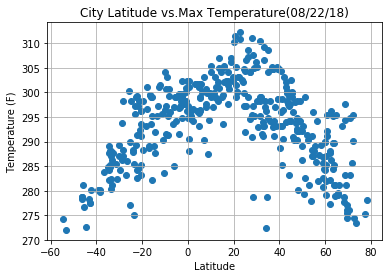

In [29]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude vs.Max Temperature(08/22/18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Humidity Plot

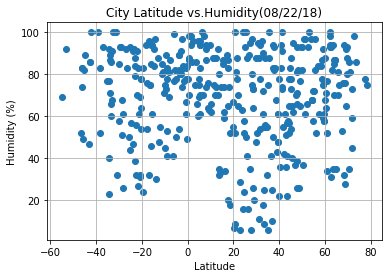

In [30]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude vs.Humidity(08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

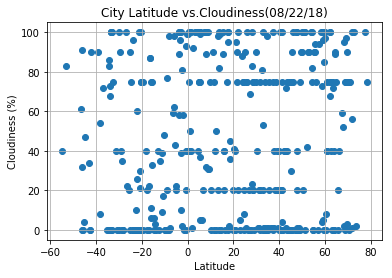

In [31]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude vs.Cloudiness(08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

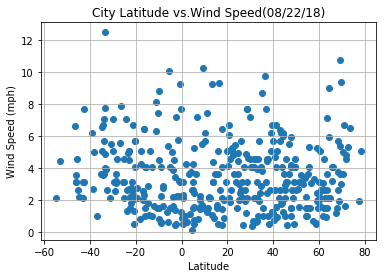

In [32]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude vs.Wind Speed(08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)